---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
# Lets import the .csv file into pandas dataframe
df = pd.read_csv("./fraud_data.csv")

# Lets check the shape: there are 21693 rows (transactions) and 30 columns
print(df.shape)

# Lets see the first 5 rows of data
df.head()

(21693, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [3]:
# Lets extract the values from the column class into a np.array and the use the np-bincount method to count the number of
# occurrences of each value.
counts= np.bincount(df["Class"].values)
for name, count in zip(['Not Frauds(0)=\t ','Frauds(1)=\t '],counts):
    print(name,count)

# Lets divide the counts from frauds by total amount of counts
percentage_frauds = counts[1]/(counts[0]+counts[1])

percentage_frauds

Not Frauds(0)=	  21337
Frauds(1)=	  356


0.016410823768035772

In [4]:
def answer_one():
    
    df = pd.read_csv("./fraud_data.csv")
    counts= np.bincount(df["Class"].values)
    percentage_frauds = counts[1]/(counts[0]+counts[1])
    
    return percentage_frauds

In [5]:
answer_one()

0.016410823768035772

In [6]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('./fraud_data.csv')

# Selects all the features. To do this all the rows from columns but the last one ("Class") are selected
X = df.iloc[:,:-1]
# Selects the labels. To do this all the rows from the last column "Class" are selected
y = df.iloc[:,-1]

# Lets do train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Lets print the head of the dataframe with features
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67


In [8]:
# Lets print the head of the series containing the labels
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

# Lets create a dummy classifier and define the parameter strategy with the most_frequent value
# This dummy classifier will predict the most frequent class (in this case 0) to all its predictions
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

# Lets compute the accuracy of the dummy classifier
accuracy = dummy_majority.score(X_test, y_test)

# Lets compute the recall score of the dummy classifier, but first we need the predictions of the classifier
y_dummy_predictions = dummy_majority.predict(X_test)
recall = recall_score(y_test, y_dummy_predictions)

# Now that we have both values we can make a tuple containing (accuracy score, recall score)
result = (accuracy, recall)

result

# We can see that the accuracy is pretty high because the two classes are unbalanced.
# This accuracy is our baseline, our classifier should improve this value.
# The recall value es 0, meaning that from all the positive instances in y_test, zero were correctly predicted

(0.98525073746312686, 0.0)

In [10]:
# Lets analyze why the recall value is 0.0
# Lets see how many frauds in y_test were correctly predicted in the dummy predicions
y_dummy_predictions[y_test==1]

# We can see that from all the 80 frauds inside y_test, none were classified as possitive in y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    # Creation of dummy classifier and predictions
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    
    accuracy = dummy_majority.score(X_test, y_test)
    recall = recall_score(y_test, y_dummy_predictions)

    result = (accuracy, recall)

    return result

In [12]:
answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [13]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

# Lets create classifier and train it
svm = SVC().fit(X_train, y_train)
# Lets make predictions with the classifier with not previously seen data in X_test
y_svm_predictions = svm.predict(X_test)

# Compute different scores
accuracy = svm.score(X_test, y_test)
recall = recall_score(y_test, y_svm_predictions)
precision = precision_score(y_test, y_svm_predictions)

result = (accuracy,recall, precision)

result

# The precision incrased compared to the dummy, so more TP and TN are being well assigned
# Recall is 0,35 meaning that only 1/3 of the frauds (TP) are being identified, but still 2/3 of the frauds
# are not being detected and considered FN.
# Precision is high, but indicate that from all the frauds identified, some of them are false positives.

(0.99078171091445433, 0.375, 1.0)

In [14]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    # Lets create classifier and train it
    svm = SVC().fit(X_train, y_train)
    # Lets make predictions with the classifier with not previously seen data in X_test
    y_svm_predictions = svm.predict(X_test)

    # Compute different scores
    accuracy = svm.score(X_test, y_test)
    recall = recall_score(y_test, y_svm_predictions)
    precision = precision_score(y_test, y_svm_predictions)

    result = (accuracy,recall, precision)

    return result

In [15]:
answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [16]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

# Lets create classifier and train it
svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
# Lets make predictions with the classifier with not previously seen data in X_test
y_svm_predictions = svm.predict(X_test)
# Lets compute the decision function for each prediction inside y_svm_predictions
y_svm_scores = svm.decision_function(X_test)


In [17]:
# If we make the confusion_matrix with the y_predictions we can see that has the same values
# as making a confusion matrix with the y_svm_scores>0 (choosing a threshold of cero)

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_svm_predictions)
confusion

array([[5340,    4],
       [  16,   64]])

In [18]:
# Making a confusion matrix choosing a threshold = 0
confusion_threshold_0 = confusion_matrix(y_test, y_svm_scores>0)
confusion_threshold_0

array([[5340,    4],
       [  16,   64]])

In [19]:
# So lets make a confusion_matrix choosing a threshold of -200. 
# Every instance that has a decision score > -200 will be considered in the positive prediction boundary:
# if the y_label is 1 will be a TP and if it is 0 will be a FP.
# On the other hand, 
# Every instance that has a decision score < -200 will be considered in the negative prediction boundary:
# if the y_label is 1 will be a FN and if it is 0 will be a TN

confusion_final = confusion_matrix(y_test, y_svm_scores>-220)
confusion_final

array([[5320,   24],
       [  14,   66]])

In [20]:
def answer_four():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix
    
    # Lets create classifier and train it
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    # Lets make predictions with the classifier with not previously seen data in X_test
    y_svm_predictions = svm.predict(X_test)
    # Lets compute the decision function for each prediction inside y_svm_predictions
    y_svm_scores = svm.decision_function(X_test)
    
    # Lets make the confusion matrix choosing the threshold value of -200
    threshold = -200
    confusion = confusion_matrix(y_test, y_svm_scores>threshold)
    
    return confusion

In [21]:
answer_four()

array([[5324,   20],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


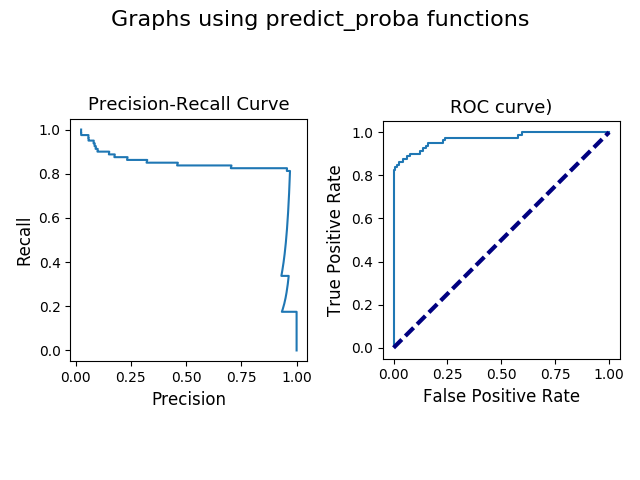

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

# Lets create and train a logistic classifier (max_iter=1000 was added to avoid getting an error)
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

### Lets compute predict_proba for X_test
# As a result two probabilities are computed: the first column the prob. to be classified as 0, and the second one the prob.
# to be classified as 1/fraud.
y_proba_lr = lr.predict_proba(X_test)
# We grab the probabilistic values of the second column because we want the probability of being a fraud
y_proba_lr = y_proba_lr[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_proba_lr)


# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)
  
# Precision-Recall curve
axis[0].plot(precision, recall)
axis[0].set_xlabel('Precision', fontsize=12)
axis[0].set_ylabel('Recall', fontsize=12)
axis[0].set_aspect('equal')
axis[0].set_title('Precision-Recall Curve', fontsize=13)

# ROC curve
# Lets compute false positive and true positive rates
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

axis[1].plot(fpr_lr, tpr_lr)
axis[1].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
axis[1].set_xlabel('False Positive Rate', fontsize=12)
axis[1].set_ylabel('True Positive Rate', fontsize=12)
axis[1].set_title('ROC curve)', fontsize=13)
axis[1].set_aspect('equal')

plt.suptitle('Graphs using predict_proba functions',fontsize=16)
plt.tight_layout()

plt.show()

In [23]:
# what is the recall when the precision is 0.75?

for p,r in list(zip(precision,recall)):
    if p == 0.75:
        print('Precision={} Recall={}'.format(p,r))

Precision=0.75 Recall=0.825


In [24]:
# what is the true positive rate when the false positive rate is 0.16?

for f,t in list(zip(fpr_lr, tpr_lr)):
    if f > 0.14 and f<0.18:
        print('False positive rate= {} True positive rate= {}'.format(round(f,2),round(t,2)))

False positive rate= 0.15 True positive rate= 0.92
False positive rate= 0.15 True positive rate= 0.94
False positive rate= 0.16 True positive rate= 0.94
False positive rate= 0.16 True positive rate= 0.95


In [25]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt 

    # Lets create and train a logistic classifier (max_iter=1000 was added to avoid getting an error)
    lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

    ### Lets compute predict_proba for X_test
    # As a result two probabilities are computed: the first column the prob. to be classified as 0, and the second one the prob.
    # to be classified as 1/fraud.
    y_proba_lr = lr.predict_proba(X_test)
    # We grab the probabilistic values of the second column because we want the probability of being a fraud
    y_proba_lr = y_proba_lr[:,1]
    precision, recall, threshold = precision_recall_curve(y_test, y_proba_lr)


    # Initialise the subplot function using number of rows and columns
    figure, axis = plt.subplots(1, 2)

    # Precision-Recall curve
    axis[0].plot(precision, recall)
    axis[0].set_xlabel('Precision', fontsize=12)
    axis[0].set_ylabel('Recall', fontsize=12)
    axis[0].set_aspect('equal')
    axis[0].set_title('Precision-Recall Curve', fontsize=13)

    # ROC curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    
    axis[1].plot(fpr_lr, tpr_lr)
    axis[1].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    axis[1].set_xlabel('False Positive Rate', fontsize=12)
    axis[1].set_ylabel('True Positive Rate', fontsize=12)
    axis[1].set_title('ROC curve)', fontsize=13)
    axis[1].set_aspect('equal')

    plt.suptitle('Graphs using predict_proba functions',fontsize=16)
    plt.tight_layout()

    plt.show()
        
    result = (0.83, 0.93)
    
    return result

<IPython.core.display.Javascript object>


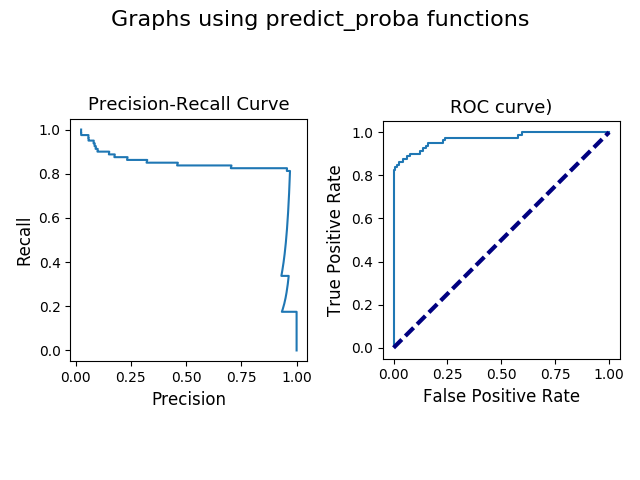

(0.83, 0.93)

In [26]:
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## 1- Lets create the Logistic classifier
clf = LogisticRegression(max_iter=100)

## 2- Lets create the GridClassifierCV
# Define the hyperparameters to test
grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
# Create the gridclassifier defining the grid_values to test and the metric to evaluate them
grid_clf_recall = GridSearchCV(clf, param_grid=grid_values, scoring="recall")
# Lets train the Gridclassifier
grid_clf_recall.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [28]:
print('Best params:\t {}'.format(grid_clf_recall.best_params_))
print('Best score:\t {}'.format(grid_clf_recall.best_score_))

Best params:	 {'C': 10, 'penalty': 'l2'}
Best score:	 0.8115942028985509


In [29]:
# Inside the attribute cv_results_ we can see all the results as dictionary of numpy arrays
# the key 'mean_test_score' has the recall scores for the different combinations
grid_clf_recall.cv_results_

{'mean_fit_time': array([ 0.17538047,  0.25936651,  0.21789376,  0.38851913,  0.32413181,
         0.46177681,  0.56219387,  0.4655145 ,  0.56140884,  0.44986463]),
 'mean_score_time': array([ 0.17838971,  0.23677135,  0.1795725 ,  0.17398469,  0.14136616,
         0.10512606,  0.13644687,  0.11114605,  0.14203405,  0.18286292]),
 'mean_test_score': array([ 0.66666667,  0.76086957,  0.80072464,  0.80434783,  0.8115942 ,
         0.8115942 ,  0.80797101,  0.8115942 ,  0.80797101,  0.80797101]),
 'mean_train_score': array([ 0.68115942,  0.77355072,  0.80615942,  0.8134058 ,  0.81884058,
         0.81702899,  0.82427536,  0.82427536,  0.82427536,  0.82427536]),
 'param_C': masked_array(data = [0.01 0.01 0.1 0.1 1 1 10 10 100 100],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_penalty': masked_array(data = ['l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2'],
              mask = [False False False False False False Fals

In [30]:
# Lets create a dataframe with the dictionary inside grid_clf_recall.cv_results_

df = pd.DataFrame(grid_clf_recall.cv_results_)
df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.175380,0.178390,0.666667,0.681159,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",10,0.706522,0.690217,0.695652,0.673913,0.597826,0.679348,0.077137,0.014957,0.048879,0.006778
1,0.259367,0.236771,0.760870,0.773551,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",9,0.804348,0.771739,0.750000,0.766304,0.728261,0.782609,0.079529,0.028090,0.031999,0.006778
2,0.217894,0.179573,0.800725,0.806159,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",8,0.804348,0.798913,0.836957,0.798913,0.760870,0.820652,0.070715,0.012359,0.031168,0.010248
3,0.388519,0.173985,0.804348,0.813406,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",7,0.826087,0.809783,0.836957,0.804348,0.750000,0.826087,0.059402,0.012540,0.038685,0.009237
4,0.324132,0.141366,0.811594,0.818841,1,l1,"{'C': 1, 'penalty': 'l1'}",2,0.826087,0.820652,0.836957,0.809783,0.771739,0.826087,0.017669,0.105899,0.028529,0.006778


In [31]:
# Lets sort the df using the param_C values in ascending order so that we can extract the mean_test_scores in the same order
df = df.sort_values("param_C", ascending=True)
df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.175380,0.178390,0.666667,0.681159,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",10,0.706522,0.690217,0.695652,0.673913,0.597826,0.679348,0.077137,0.014957,0.048879,0.006778
1,0.259367,0.236771,0.760870,0.773551,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",9,0.804348,0.771739,0.750000,0.766304,0.728261,0.782609,0.079529,0.028090,0.031999,0.006778
2,0.217894,0.179573,0.800725,0.806159,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",8,0.804348,0.798913,0.836957,0.798913,0.760870,0.820652,0.070715,0.012359,0.031168,0.010248
3,0.388519,0.173985,0.804348,0.813406,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",7,0.826087,0.809783,0.836957,0.804348,0.750000,0.826087,0.059402,0.012540,0.038685,0.009237
4,0.324132,0.141366,0.811594,0.818841,1,l1,"{'C': 1, 'penalty': 'l1'}",2,0.826087,0.820652,0.836957,0.809783,0.771739,0.826087,0.017669,0.105899,0.028529,0.006778


In [32]:
# Lets find the different values for C and l

c_values = df['param_C'].unique()
l_values = df['param_penalty'].unique()

print(c_values, l_values)

[0.01 0.1 1 10 100] ['l1' 'l2']


In [38]:
# Lets extract the mean_test_scores(recall) from each C value and l1
recall_l1= df['mean_test_score'][df['param_penalty']=='l1']
recall_l1

0    0.666667
2    0.800725
4    0.811594
6    0.807971
8    0.807971
Name: mean_test_score, dtype: float64

In [39]:
# Lets extract the mean_test_scores(recall) from each C value and l2
recall_l2= df['mean_test_score'][df['param_penalty']=='l2']
recall_l2

1    0.760870
3    0.804348
5    0.811594
7    0.811594
9    0.807971
Name: mean_test_score, dtype: float64

In [40]:
# Lets concatenate the series by extracting the values and their shape in order to hace each l in a column
result = np.concatenate((recall_l1.values.reshape(-1,1),recall_l2.values.reshape(-1,1)),axis=1)
result

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

In [41]:
# We can see that the shape is (5,2) as requested
result.shape

(5, 2)

In [42]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    ## 1- Lets create the Logistic classifier
    clf = LogisticRegression()

    ## 2- Lets create the GridClassifierCV
    # Define the hyperparameters to test
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    # Create the gridclassifier defining the grid_values to test and the metric to evaluate them
    grid_clf_recall = GridSearchCV(clf, param_grid=grid_values, scoring="recall")
    # Lets train the Gridclassifier
    grid_clf_recall.fit(X_train, y_train)
    
    # Lets create a dataframe with all the results obtained from the GridSearchCV
    # All the information is inside the attribute .cv_results_
    df = pd.DataFrame(grid_clf_recall.cv_results_)
    # Lets sort the columns where all the values of C are so that when we extract them in the correct ascending order
    df = df.sort_values("param_C", ascending=True)
    
    # Lets make a list with all the values of C ([[0.01, 0.1, 1, 10, 100]]) so that we use them to extract the recall values
    c_values = df['param_C'].unique()
    
    # Lets extract into series the recall values for each value of L (["l1", "l2"])
    recall_l1= df['mean_test_score'][df['param_penalty']=='l1']
    recall_l2= df['mean_test_score'][df['param_penalty']=='l2']
    
    # lets extract the values from each series, reshape them to be in columns and concatenate them to make one array
    result = np.concatenate((recall_l1.values.reshape(-1,1),recall_l2.values.reshape(-1,1)),axis=1)

    return result

In [43]:
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


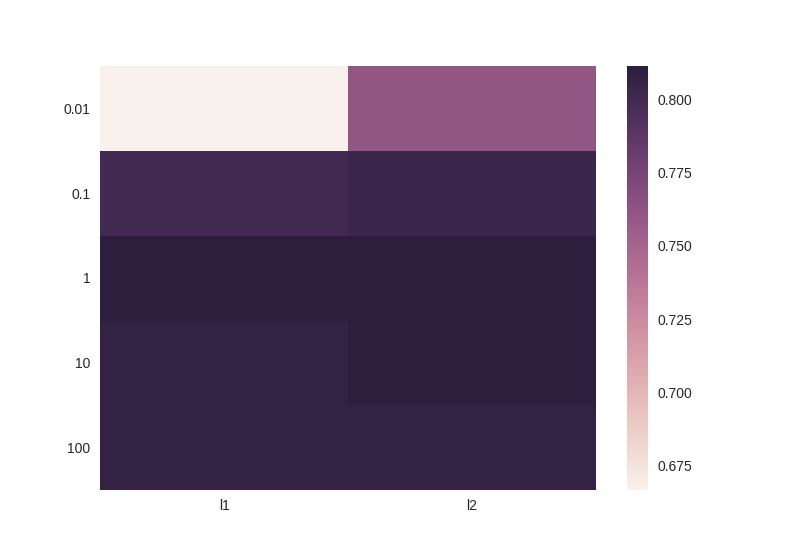

In [44]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())